Ảnh kết quả đã được lưu vào kiwi_wave.jpg


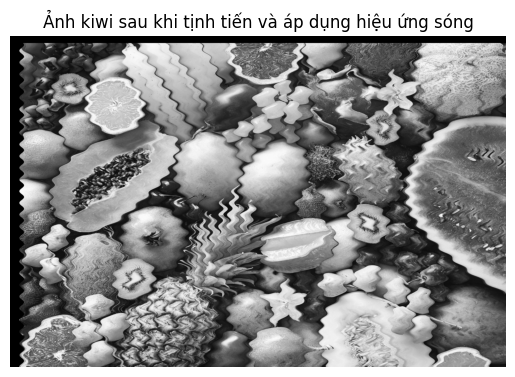

In [1]:
# Bài 1:
# Chọn ảnh quả kiwi bất kì .
# Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
# Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
# Lưu ảnh kết quả vào file kiwi_wave.jpg

import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt

# Đọc ảnh grayscale hoặc RGB tùy ý
try:
    img = iio.imread('colorful-ripe-tropical-fruits.jpg')
except FileNotFoundError:
    print("Không tìm thấy ảnh 'colorful-ripe-tropical-fruits.jpg'. Hãy chắc chắn ảnh nằm cùng thư mục với file code.")
    exit()

# Nếu ảnh là màu RGB thì convert sang ảnh xám
if img.ndim == 3:
    from skimage.color import rgb2gray
    img = rgb2gray(img)
    img = (img * 255).astype(np.uint8)  # chuyển về uint8

# --------- Bước 1: Tịnh tiến ảnh 50 pixel phải, 30 pixel xuống ---------
translated_img = nd.shift(img, shift=(30, 50))  # (trục y, trục x)

# --------- Bước 2: Áp dụng hiệu ứng sóng (wave effect) ---------
rows, cols = translated_img.shape
# Tạo lưới tọa độ
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Biến đổi sóng trên trục x
x_wave = x + 10 * np.sin(2 * np.pi * y / 50)  # biên độ 10, bước sóng 50 pixel
y_wave = y

# Ánh xạ tọa độ mới
coords = np.array([y_wave, x_wave])
wave_img = nd.map_coordinates(translated_img, coords, order=1, mode='reflect')

# --------- Bước 3: Lưu ảnh kết quả ---------
output_path = 'kiwi_wave.jpg'
iio.imwrite(output_path, wave_img.astype(np.uint8))
print(f"Ảnh kết quả đã được lưu vào {output_path}")

# (Tùy chọn) Hiển thị ảnh kết quả
plt.imshow(wave_img, cmap='gray')
plt.title('Ảnh kiwi sau khi tịnh tiến và áp dụng hiệu ứng sóng')
plt.axis('off')
plt.show()

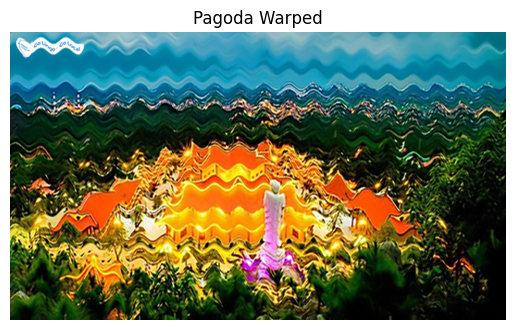

In [4]:
# Bài 4:

# Chọn ngôi chùa bất kì.
# Phóng to ngôi chùa lên 5 lần.
# Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
# Lưu ảnh kết quả vào pagoda_warped.jpg.

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, map_coordinates

# Đọc ảnh ngôi chùa
pagoda = iio.imread('pagoda.jpg')

# Phóng to ảnh lên 5 lần
pagoda_zoomed = zoom(pagoda, (5, 5, 1)) if pagoda.ndim == 3 else zoom(pagoda, (5, 5))

# Kích thước mới
h, w = pagoda_zoomed.shape[:2]

# Tạo lưới tọa độ
x, y = np.meshgrid(np.arange(w), np.arange(h))

# Tạo hiệu ứng uốn cong bằng cách biến đổi tọa độ y theo hàm sin
offset = 20 * np.sin(2 * np.pi * x / 150)  # thay đổi biên độ và tần số nếu cần
y_warped = y + offset

# Đảm bảo tọa độ không vượt quá giới hạn
y_warped = np.clip(y_warped, 0, h - 1)

# Chuẩn bị lưới tọa độ biến đổi
coords = np.array([y_warped, x])

# Áp dụng biến đổi cho từng kênh nếu ảnh màu
if pagoda_zoomed.ndim == 3:
    warped = np.zeros_like(pagoda_zoomed)
    for c in range(3):
        warped[:, :, c] = map_coordinates(pagoda_zoomed[:, :, c], coords, order=1, mode='reflect')
else:
    warped = map_coordinates(pagoda_zoomed, coords, order=1, mode='reflect')

# Lưu ảnh kết quả
iio.imwrite('pagoda_warped.jpg', warped.astype(np.uint8))

# Hiển thị kết quả
plt.imshow(warped.astype(np.uint8))
plt.axis('off')
plt.title('Pagoda Warped')
plt.show()



=== MENU BIẾN ĐỔI ẢNH ===
1. Tịnh tiến ảnh
2. Xoay ảnh
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)
0. Thoát
Chọn chức năng (0-5): 4
Nhập giá trị sigma cho Gaussian blur: 50


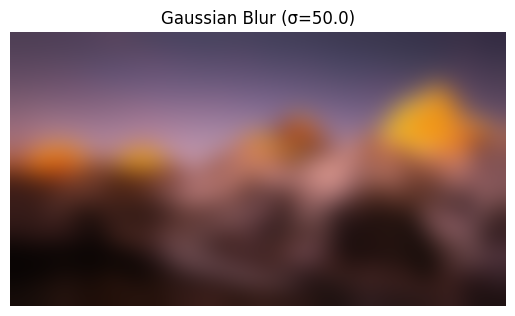


=== MENU BIẾN ĐỔI ẢNH ===
1. Tịnh tiến ảnh
2. Xoay ảnh
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)
0. Thoát
Chọn chức năng (0-5): 2
Nhập góc xoay (độ): 60
Có reshape ảnh không? (True/False): True


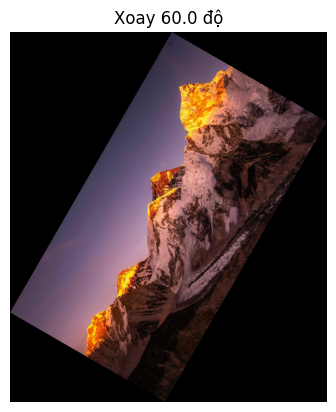


=== MENU BIẾN ĐỔI ẢNH ===
1. Tịnh tiến ảnh
2. Xoay ảnh
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)
0. Thoát
Chọn chức năng (0-5): 3
Nhập hệ số zoom (ví dụ: 0.5 thu nhỏ, 2 phóng to): 1


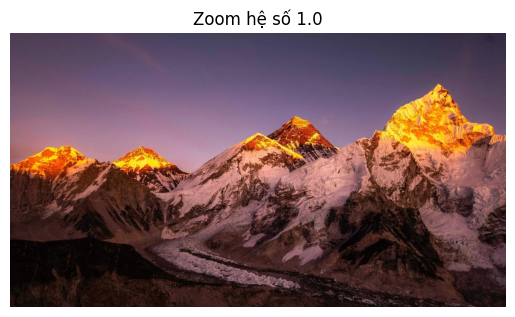


=== MENU BIẾN ĐỔI ẢNH ===
1. Tịnh tiến ảnh
2. Xoay ảnh
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)
0. Thoát
Chọn chức năng (0-5): 5
Nhập biên độ sóng (amplitude): 10


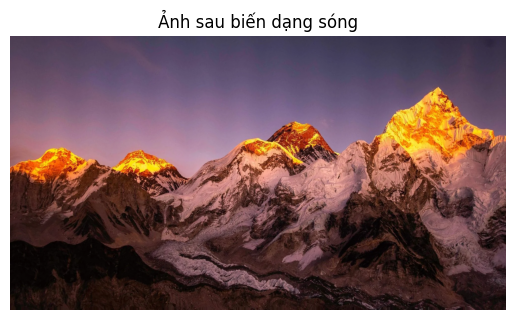


=== MENU BIẾN ĐỔI ẢNH ===
1. Tịnh tiến ảnh
2. Xoay ảnh
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)
0. Thoát
Chọn chức năng (0-5): 1
Nhập số pixel tịnh tiến theo trục x: 35
Nhập số pixel tịnh tiến theo trục y: 20


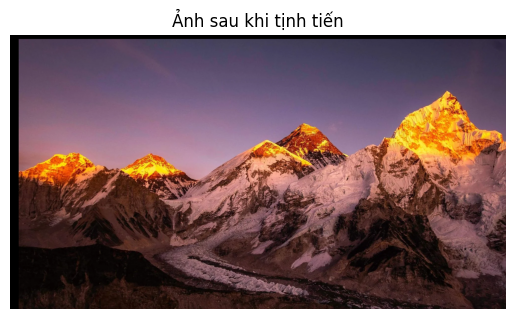


=== MENU BIẾN ĐỔI ẢNH ===
1. Tịnh tiến ảnh
2. Xoay ảnh
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)
0. Thoát
Chọn chức năng (0-5): 0
Kết thúc chương trình.


In [5]:
# Bài 5:

# Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
# Tịnh tiến (hỏi số pixel di chuyển theo x và y).
# Xoay (hỏi góc xoay và chọn reshape=True/False).
# Phóng to/thu nhỏ (hỏi hệ số zoom).
# Làm mờ Gaussian (hỏi giá trị sigma).
# Biến đổi sóng (hỏi biên độ sóng).

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import shift, rotate, zoom, gaussian_filter, map_coordinates

# Hàm hiển thị ảnh
def show_image(img, title='Kết quả'):
    plt.imshow(img.astype(np.uint8))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Đọc ảnh
try:
    image = iio.imread('mountain.jpg')  # Thay bằng tên ảnh của bạn
except FileNotFoundError:
    print("Không tìm thấy file ảnh 'mountain.jpg'. Hãy đảm bảo ảnh nằm cùng thư mục với file code.")
    exit()

while True:
    print("\n=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Tịnh tiến ảnh")
    print("2. Xoay ảnh")
    print("3. Phóng to / Thu nhỏ")
    print("4. Làm mờ Gaussian")
    print("5. Biến dạng sóng (warp)")
    print("0. Thoát")

    choice = input("Chọn chức năng (0-5): ")

    if choice == "1":
        dx = int(input("Nhập số pixel tịnh tiến theo trục x: "))
        dy = int(input("Nhập số pixel tịnh tiến theo trục y: "))
        shifted = shift(image, shift=(dy, dx, 0) if image.ndim == 3 else (dy, dx))
        show_image(shifted, 'Ảnh sau khi tịnh tiến')

    elif choice == "2":
        angle = float(input("Nhập góc xoay (độ): "))
        reshape_str = input("Có reshape ảnh không? (True/False): ").strip().lower()
        reshape = reshape_str == "true"
        rotated = rotate(image, angle=angle, reshape=reshape)
        show_image(rotated, f'Xoay {angle} độ')

    elif choice == "3":
        factor = float(input("Nhập hệ số zoom (ví dụ: 0.5 thu nhỏ, 2 phóng to): "))
        if image.ndim == 3:
            zoomed = zoom(image, (factor, factor, 1))
        else:
            zoomed = zoom(image, (factor, factor))
        show_image(zoomed, f'Zoom hệ số {factor}')

    elif choice == "4":
        sigma = float(input("Nhập giá trị sigma cho Gaussian blur: "))
        blurred = gaussian_filter(image, sigma=(sigma, sigma, 0) if image.ndim == 3 else sigma)
        show_image(blurred, f'Gaussian Blur (σ={sigma})')

    elif choice == "5":
        amp = float(input("Nhập biên độ sóng (amplitude): "))
        h, w = image.shape[:2]
        x, y = np.meshgrid(np.arange(w), np.arange(h))
        offset = amp * np.sin(2 * np.pi * x / 150)
        y_warped = y + offset
        y_warped = np.clip(y_warped, 0, h - 1)
        coords = np.array([y_warped, x])
        if image.ndim == 3:
            warped = np.zeros_like(image)
            for c in range(3):
                warped[..., c] = map_coordinates(image[..., c], coords, order=1, mode='reflect')
        else:
            warped = map_coordinates(image, coords, order=1, mode='reflect')
        show_image(warped, 'Ảnh sau biến dạng sóng')

    elif choice == "0":
        print("Kết thúc chương trình.")
        break

    else:
        print("Lựa chọn không hợp lệ. Vui lòng chọn từ 0 đến 5.")


In [2]:
# Bài 2:
# Chọn quả đu đủ và dưa hấu từ google.
# Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
# Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

from PIL import Image
import numpy as np

def apply_gradient(image, start_color, end_color):
    """Áp màu gradient từ start_color → end_color cho ảnh xám"""
    image = image.convert('L')  # chuyển sang ảnh xám
    img_arr = np.array(image)

    # Chuẩn hóa thành giá trị 0 - 1
    norm = img_arr / 255.0
    gradient = np.zeros((img_arr.shape[0], img_arr.shape[1], 3), dtype=np.uint8)

    for i in range(3):
        gradient[..., i] = (start_color[i] + norm * (end_color[i] - start_color[i])).astype(np.uint8)

    return Image.fromarray(gradient, 'RGB')

# -------- Bước 1: Mở ảnh --------
papaya = Image.open('colorful-ripe-tropical-fruits.jpg').convert('RGBA')     # đu đủ
watermelon = Image.open('colorful-ripe-tropical-fruits.jpg').convert('RGBA')  # dưa hấu

# -------- Bước 2: Tô màu gradient --------
# Đu đủ: đỏ → xanh lá
papaya_gray = papaya.convert('L')
papaya_colored = apply_gradient(papaya_gray, start_color=(255, 0, 0), end_color=(0, 255, 0))
papaya_alpha = papaya.split()[3]
papaya_rgba = Image.merge('RGBA', (*papaya_colored.split(), papaya_alpha))

# Dưa hấu: vàng → tím
watermelon_gray = watermelon.convert('L')
watermelon_colored = apply_gradient(watermelon_gray, start_color=(255, 255, 0), end_color=(128, 0, 128))
watermelon_alpha = watermelon.split()[3]
watermelon_rgba = Image.merge('RGBA', (*watermelon_colored.split(), watermelon_alpha))

# -------- Bước 3: Ghép ảnh lên nền trong suốt --------
# Tạo nền trong suốt kích thước phù hợp
width = max(papaya.width, watermelon.width) * 2
height = max(papaya.height, watermelon.height)
background = Image.new('RGBA', (width, height), (0, 0, 0, 0))

# Dán hai ảnh lên nền trong suốt
background.paste(papaya_rgba, (0, 0), mask=papaya_rgba)
background.paste(watermelon_rgba, (papaya.width, 0), mask=watermelon_rgba)

# -------- Bước 4: Lưu kết quả --------
output_path = 'fruit_combined.png'
background.save(output_path)
print(f"Ảnh đã lưu tại: {output_path}")


Ảnh đã lưu tại: fruit_combined.png


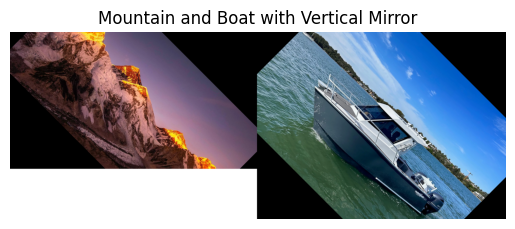

In [3]:
# Bài 3:

# Chọn ảnh núi và thuyền .
# Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
# Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
# Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Đọc ảnh núi và thuyền
mountain = iio.imread('mountain.jpg')
boat = iio.imread('boat.jpg')

# Xoay 45 độ, không thay đổi kích thước ảnh (reshape=False)
mountain_rot = rotate(mountain, angle=45, reshape=False)
boat_rot = rotate(boat, angle=45, reshape=False)

# Phản chiếu dọc (vertical mirror): lật ảnh theo trục dọc
mountain_mirror = np.fliplr(mountain_rot)
boat_mirror = np.fliplr(boat_rot)

# Tạo canvas trắng đủ lớn để chứa cả hai ảnh
# Tính chiều cao và chiều rộng lớn nhất
h = max(mountain_mirror.shape[0], boat_mirror.shape[0])
w = mountain_mirror.shape[1] + boat_mirror.shape[1]

# Khởi tạo canvas trắng (RGB)
canvas = np.ones((h, w, 3), dtype=np.uint8) * 255  # trắng

# Gán ảnh núi vào bên trái canvas
canvas[:mountain_mirror.shape[0], :mountain_mirror.shape[1]] = mountain_mirror

# Gán ảnh thuyền vào bên phải canvas
canvas[:boat_mirror.shape[0], mountain_mirror.shape[1]:] = boat_mirror

# Lưu ảnh kết quả
iio.imwrite('mountain_boat_mirror.jpg', canvas)

# Hiển thị ảnh
plt.imshow(canvas)
plt.axis('off')
plt.title('Mountain and Boat with Vertical Mirror')
plt.show()
